In [6]:
# 인구수 데이터 가져오기
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import requests
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning 제거

In [24]:
df_2019 = pd.read_csv('living_p_2019.csv', encoding='utf-8', thousands=',')
df_2020 = pd.read_csv('living_p_2020.csv', encoding='utf-8', thousands=',')
df_2021 = pd.read_csv('living_p_2021.csv', encoding='utf-8', thousands=',')
df_2022 = pd.read_csv('living_p_2022.csv', encoding='utf-8', thousands=',')
df_2023 = pd.read_csv('living_p_2023.csv', encoding='utf-8', thousands=',')

In [25]:
df_2019

,기준일ID,시간대구분,자치구코드,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,...,여자30세부터34세생활인구수,여자35세부터39세생활인구수,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수,Column1
0,20190101,0,11110,247783.9476,6613.1044,3564.9470,6134.7190,12757.6730,13424.9912,9679.4043,...,8455.5240,8669.4651,7764.7926,9659.7779,8421.0455,8671.2045,8079.0106,6242.6970,17962.9680,2.019010e+13
1,20190101,0,11140,176516.2769,4735.9065,1857.9963,3251.4707,7456.5552,8482.9745,8253.8513,...,7425.3943,7345.0904,5858.8981,6255.6065,5525.2377,6293.4810,5906.2118,4298.7062,12303.3213,2.019010e+13
2,20190101,0,11170,287806.8492,7274.7405,3654.3768,5865.4531,11656.1407,15548.7770,14457.9881,...,13423.3780,13009.2350,10794.0704,10880.1619,8360.3558,9568.1641,8703.7465,6648.3724,20296.2431,2.019010e+13
3,20190101,0,11200,335106.5204,12278.8839,5306.1528,6766.7787,11593.4668,13941.8426,13447.0673,...,14046.9836,15142.1260,12029.9710,13051.1879,11475.2065,13219.4730,12022.8741,9093.4057,24370.0786,2.019010e+13
4,20190101,0,11215,399818.0269,12003.9916,6472.3827,12056.0837,17503.8179,18611.2942,16219.1953,...,16189.7277,16158.7700,14059.8023,15750.9307,14705.5715,15708.3156,14021.6731,9907.6266,24975.8391,2.019010e+13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211195,20191231,23,11620,512045.7410,13292.1313,6492.1774,10001.0660,20423.9464,34108.8311,27984.1499,...,22645.1803,20459.1792,16839.3671,17200.5078,16012.9977,18377.4578,16540.6608,13771.6139,32595.2666,2.020010e+13
211196,20191231,23,11650,507017.9562,17249.4614,9728.3280,15440.6841,15643.9679,18565.4597,17723.9030,...,18778.2261,23145.8814,21481.7859,22961.2336,17494.8242,17660.0288,16583.0255,12881.3183,30976.3635,2.020010e+13
211197,20191231,23,11680,701730.1925,21768.6379,14313.7773,22627.7125,21085.1486,29039.6792,28890.8864,...,29317.5029,32070.2938,30395.5776,31006.2854,21940.4235,22145.4239,21115.0631,16258.7322,39325.7057,2.020010e+13
211198,20191231,23,11710,776809.6518,29303.9813,15154.6352,21907.8004,21864.3757,29286.5636,29977.2304,...,32816.1799,35769.2569,30872.0662,31988.1565,27188.8780,31098.6350,27865.7032,20081.3478,44078.4656,2.020010e+13


In [26]:
def process_df(df):
    df = df[['기준일ID', '시간대구분', '총생활인구수']]
    df = df.groupby(['기준일ID', '시간대구분']).sum().reset_index()
    return df

In [27]:
df_2019 = process_df(df_2019)
df_2020 = process_df(df_2020)
df_2021 = process_df(df_2021)
df_2022 = process_df(df_2022)
df_2023 = process_df(df_2023)

In [31]:
df_all = pd.concat([df_2019, df_2020, df_2021, df_2022, df_2023])
df_all['기준일ID'] = pd.to_datetime(df_all['기준일ID'], format='%Y%m%d')
df_all['시간대구분'] = pd.to_timedelta(df_all['시간대구분'], unit='h')
df_all['datetime'] = df_all['기준일ID'] + df_all['시간대구분']
df_all

,기준일ID,시간대구분,총생활인구수,datetime
0,2019-01-01,0 days 00:00:00,1.056159e+07,2019-01-01 00:00:00
1,2019-01-01,0 days 01:00:00,1.048849e+07,2019-01-01 01:00:00
2,2019-01-01,0 days 02:00:00,1.045464e+07,2019-01-01 02:00:00
3,2019-01-01,0 days 03:00:00,1.043796e+07,2019-01-01 03:00:00
4,2019-01-01,0 days 04:00:00,1.042652e+07,2019-01-01 04:00:00
...,...,...,...,...
8755,2023-12-31,0 days 19:00:00,9.851748e+06,2023-12-31 19:00:00
8756,2023-12-31,0 days 20:00:00,9.849985e+06,2023-12-31 20:00:00
8757,2023-12-31,0 days 21:00:00,9.847567e+06,2023-12-31 21:00:00
8758,2023-12-31,0 days 22:00:00,9.844092e+06,2023-12-31 22:00:00


15:37:51 - cmdstanpy - INFO - Chain [1] start processing
15:38:06 - cmdstanpy - INFO - Chain [1] done processing


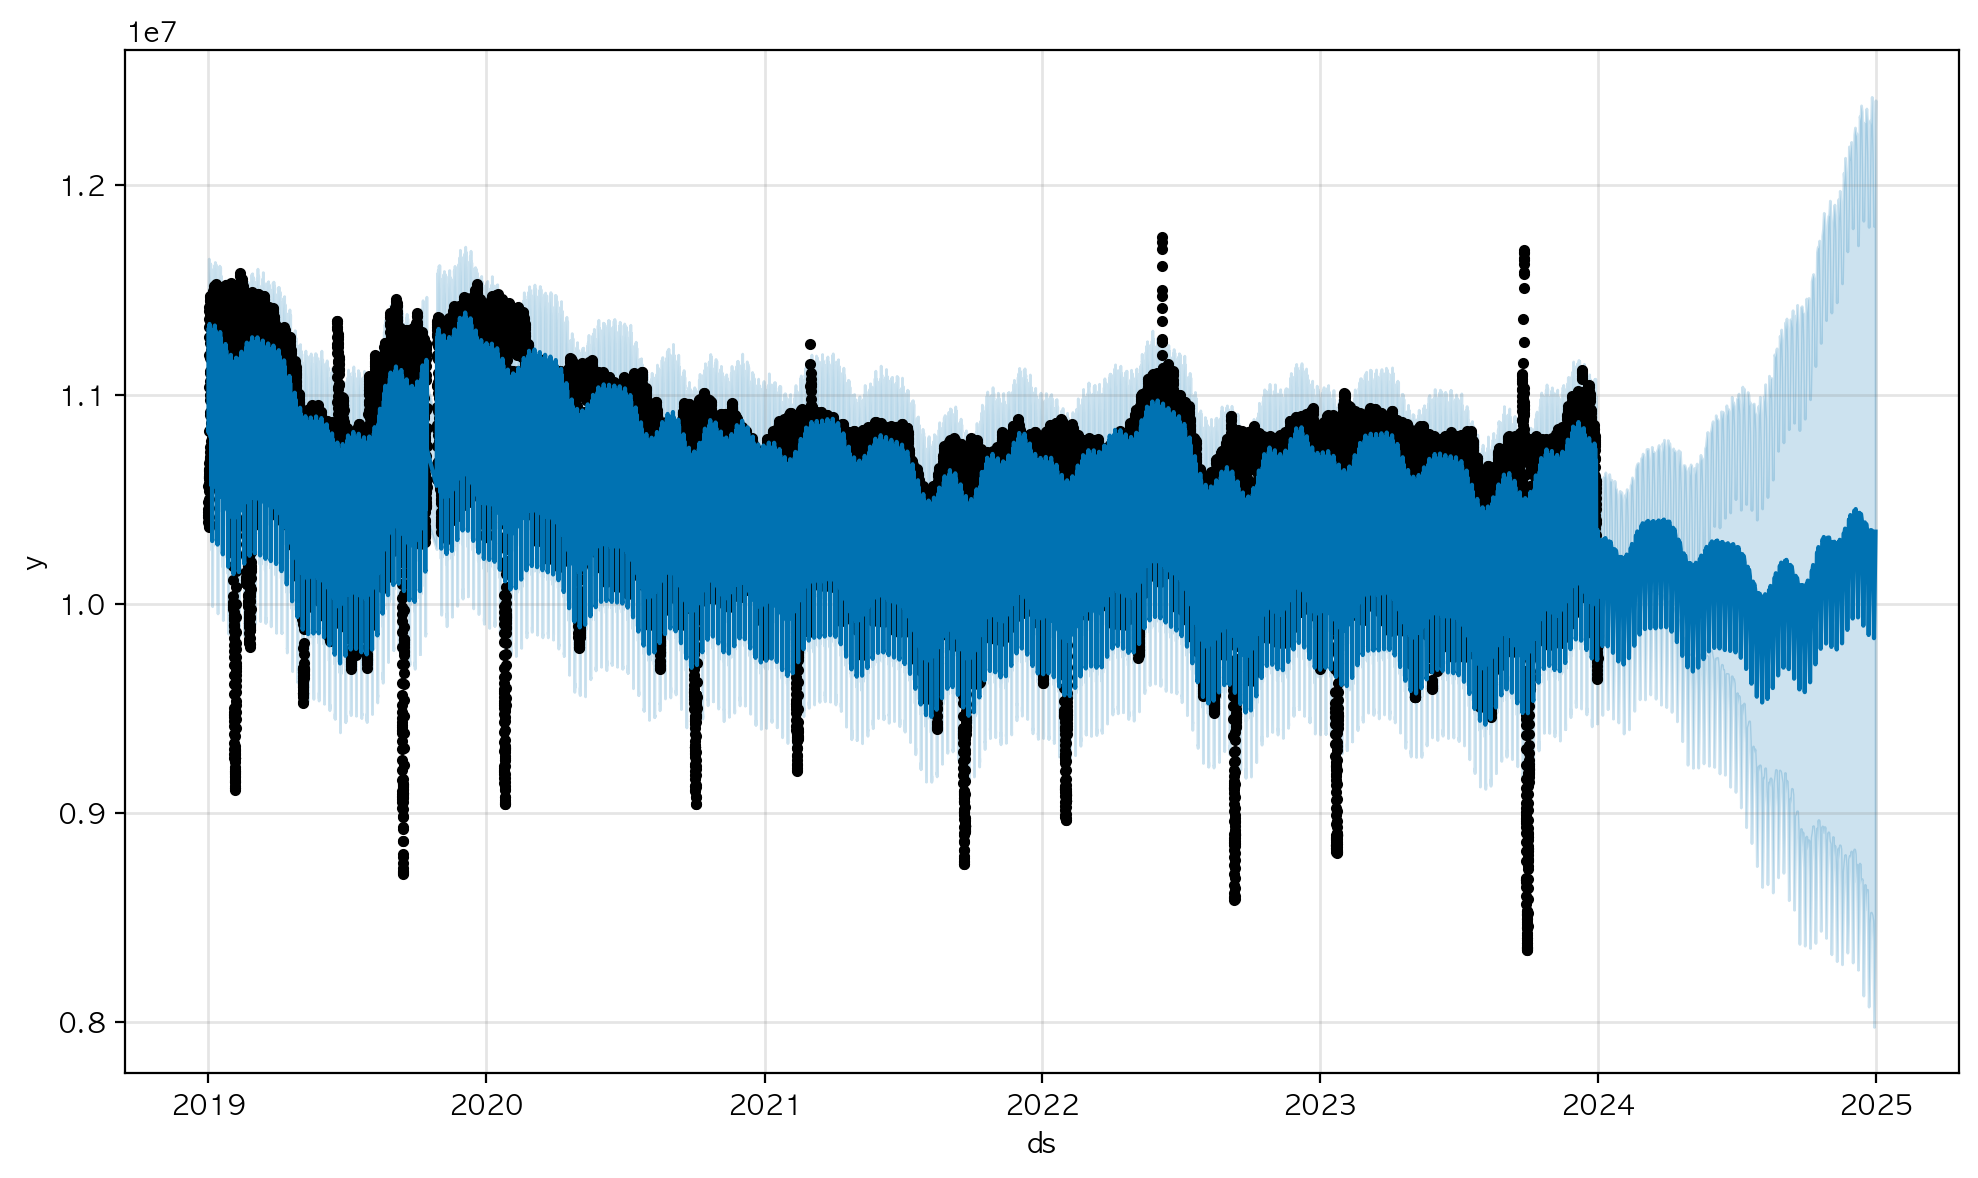

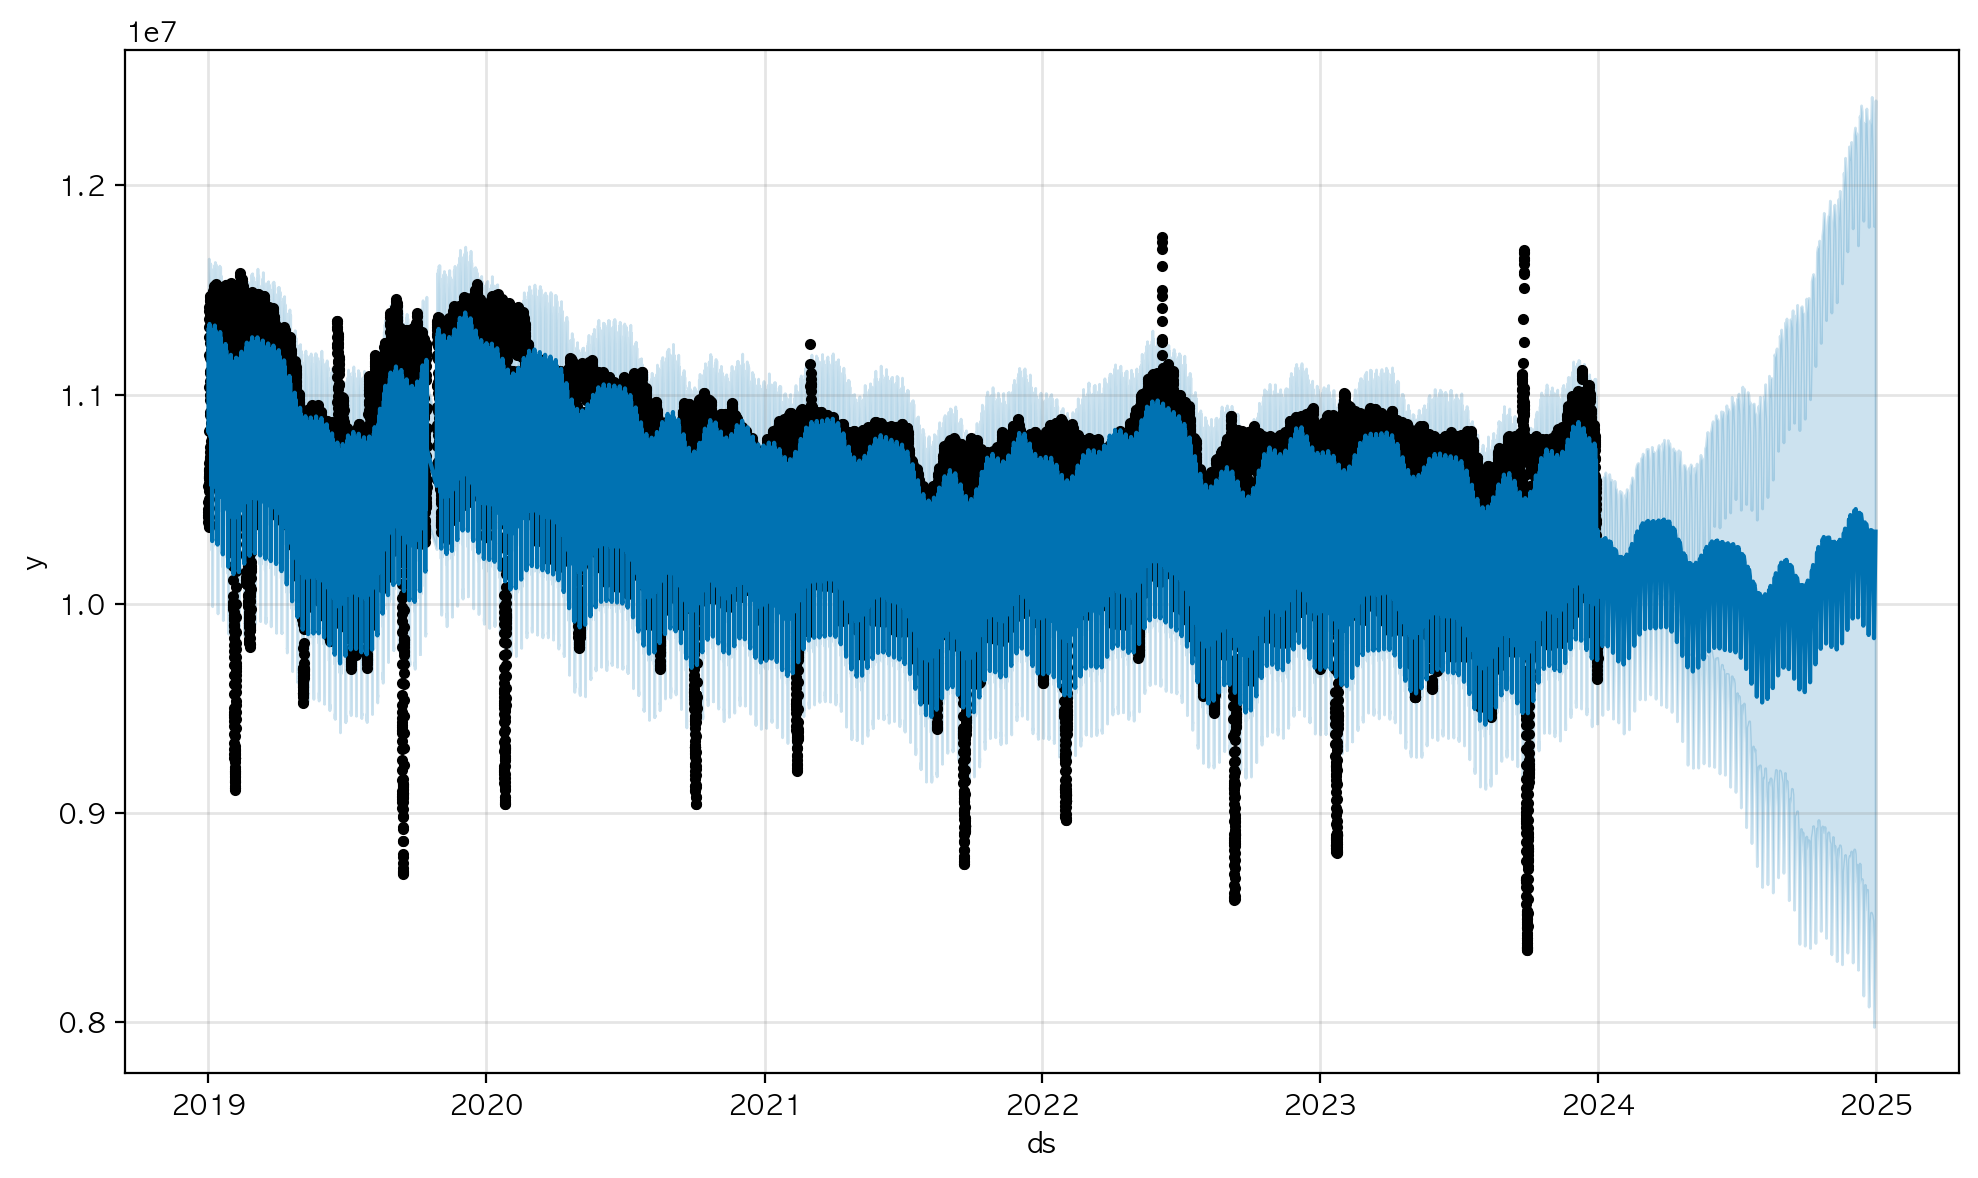

In [43]:
from prophet import Prophet

# 데이터 재구성
df_all = df_all.rename(columns={'datetime': 'ds', '총생활인구수': 'y'})

# 모델 초기화
model = Prophet()

# 모델 학습
model.fit(df_all)

# 미래 예측
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

# 예측 결과 플롯
model.plot(forecast)

In [39]:
from sklearn.metrics import mean_squared_error, r2_score

def train_test_evaluate(df_all, train_end_date, test_start_date):
    # 학습
    df_train = df_all[df_all['ds'] <= train_end_date]
    model = Prophet()
    model.fit(df_train)

    # 테스트
    df_test = df_all[df_all['ds'] > test_start_date]
    forecast = model.predict(df_test)

    # 성능 평가
    mse = mean_squared_error(df_test['y'], forecast['yhat'])
    print('Test MSE: ', mse)

    r2 = r2_score(df_test['y'], forecast['yhat'])
    print('Test R-squared: ', r2)

# 사용 예시
train_test_evaluate(df_all, '2022-12-31', '2023-01-01')

15:35:09 - cmdstanpy - INFO - Chain [1] start processing
15:35:21 - cmdstanpy - INFO - Chain [1] done processing


Test MSE:  144914584604.23447
Test R-squared:  0.08587912718875412


In [41]:
Q1 = df_all['y'].quantile(0.25)
Q3 = df_all['y'].quantile(0.75)
IQR = Q3 - Q1

# IQR 방법을 사용하여 이상치를 필터링합니다.
filter = (df_all['y'] >= Q1 - 1.5 * IQR) & (df_all['y'] <= Q3 + 1.5 *IQR)
df_filtered = df_all.loc[filter]  

# 이제 df_filtered를 사용하여 모델을 학습시킬 수 있습니다.
# model = Prophet()
# model.fit(df_filtered)
train_test_evaluate(df_filtered, '2022-12-31', '2023-01-01')

15:36:08 - cmdstanpy - INFO - Chain [1] start processing
15:36:21 - cmdstanpy - INFO - Chain [1] done processing


Test MSE:  128736531381.13095
Test R-squared:  -0.07042475178259266


In [44]:
from sklearn.linear_model import LinearRegression

# X는 독립 변수, y는 종속 변수입니다.
X = df_all[['ds']]
y = df_all['y']

# 선형 회귀 모델을 학습시킵니다.
model = LinearRegression()
model.fit(X, y)

# 모델의 계수와 절편을 출력합니다.
print('Coefficient: ', model.coef_)
print('Intercept: ', model.intercept_)

Coefficient:  [-3.39117071e-12]
Intercept:  15943584.904703878


In [47]:
from statsmodels.tsa.arima.model import ARIMA

def train_arima_model(data, order):
    model = ARIMA(data, order=order)
    model_fit = model.fit()
    return model_fit

# 사용 예시
model_fit = train_arima_model(df_all['y'], (5,1,0))
print(model_fit.summary())

/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                43512
Model:                 ARIMA(5, 1, 0)   Log Likelihood             -543729.978
Date:                Fri, 26 Jan 2024   AIC                        1087471.956
Time:                        15:47:44   BIC                        1087524.041
Sample:                             0   HQIC                       1087488.378
                              - 43512                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5843      0.000   5174.378      0.000       0.584       0.584
ar.L2         -0.0660      0.000   -313.915      0.000      -0.066      -0.066
ar.L3         -0.0047      0.000    -17.793      0.0